In [1]:
from solve_rg_eqs import solve_Gs_list, G_to_g, unpack_dims, bootstrap_g0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

# Plots from previous run's data

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]


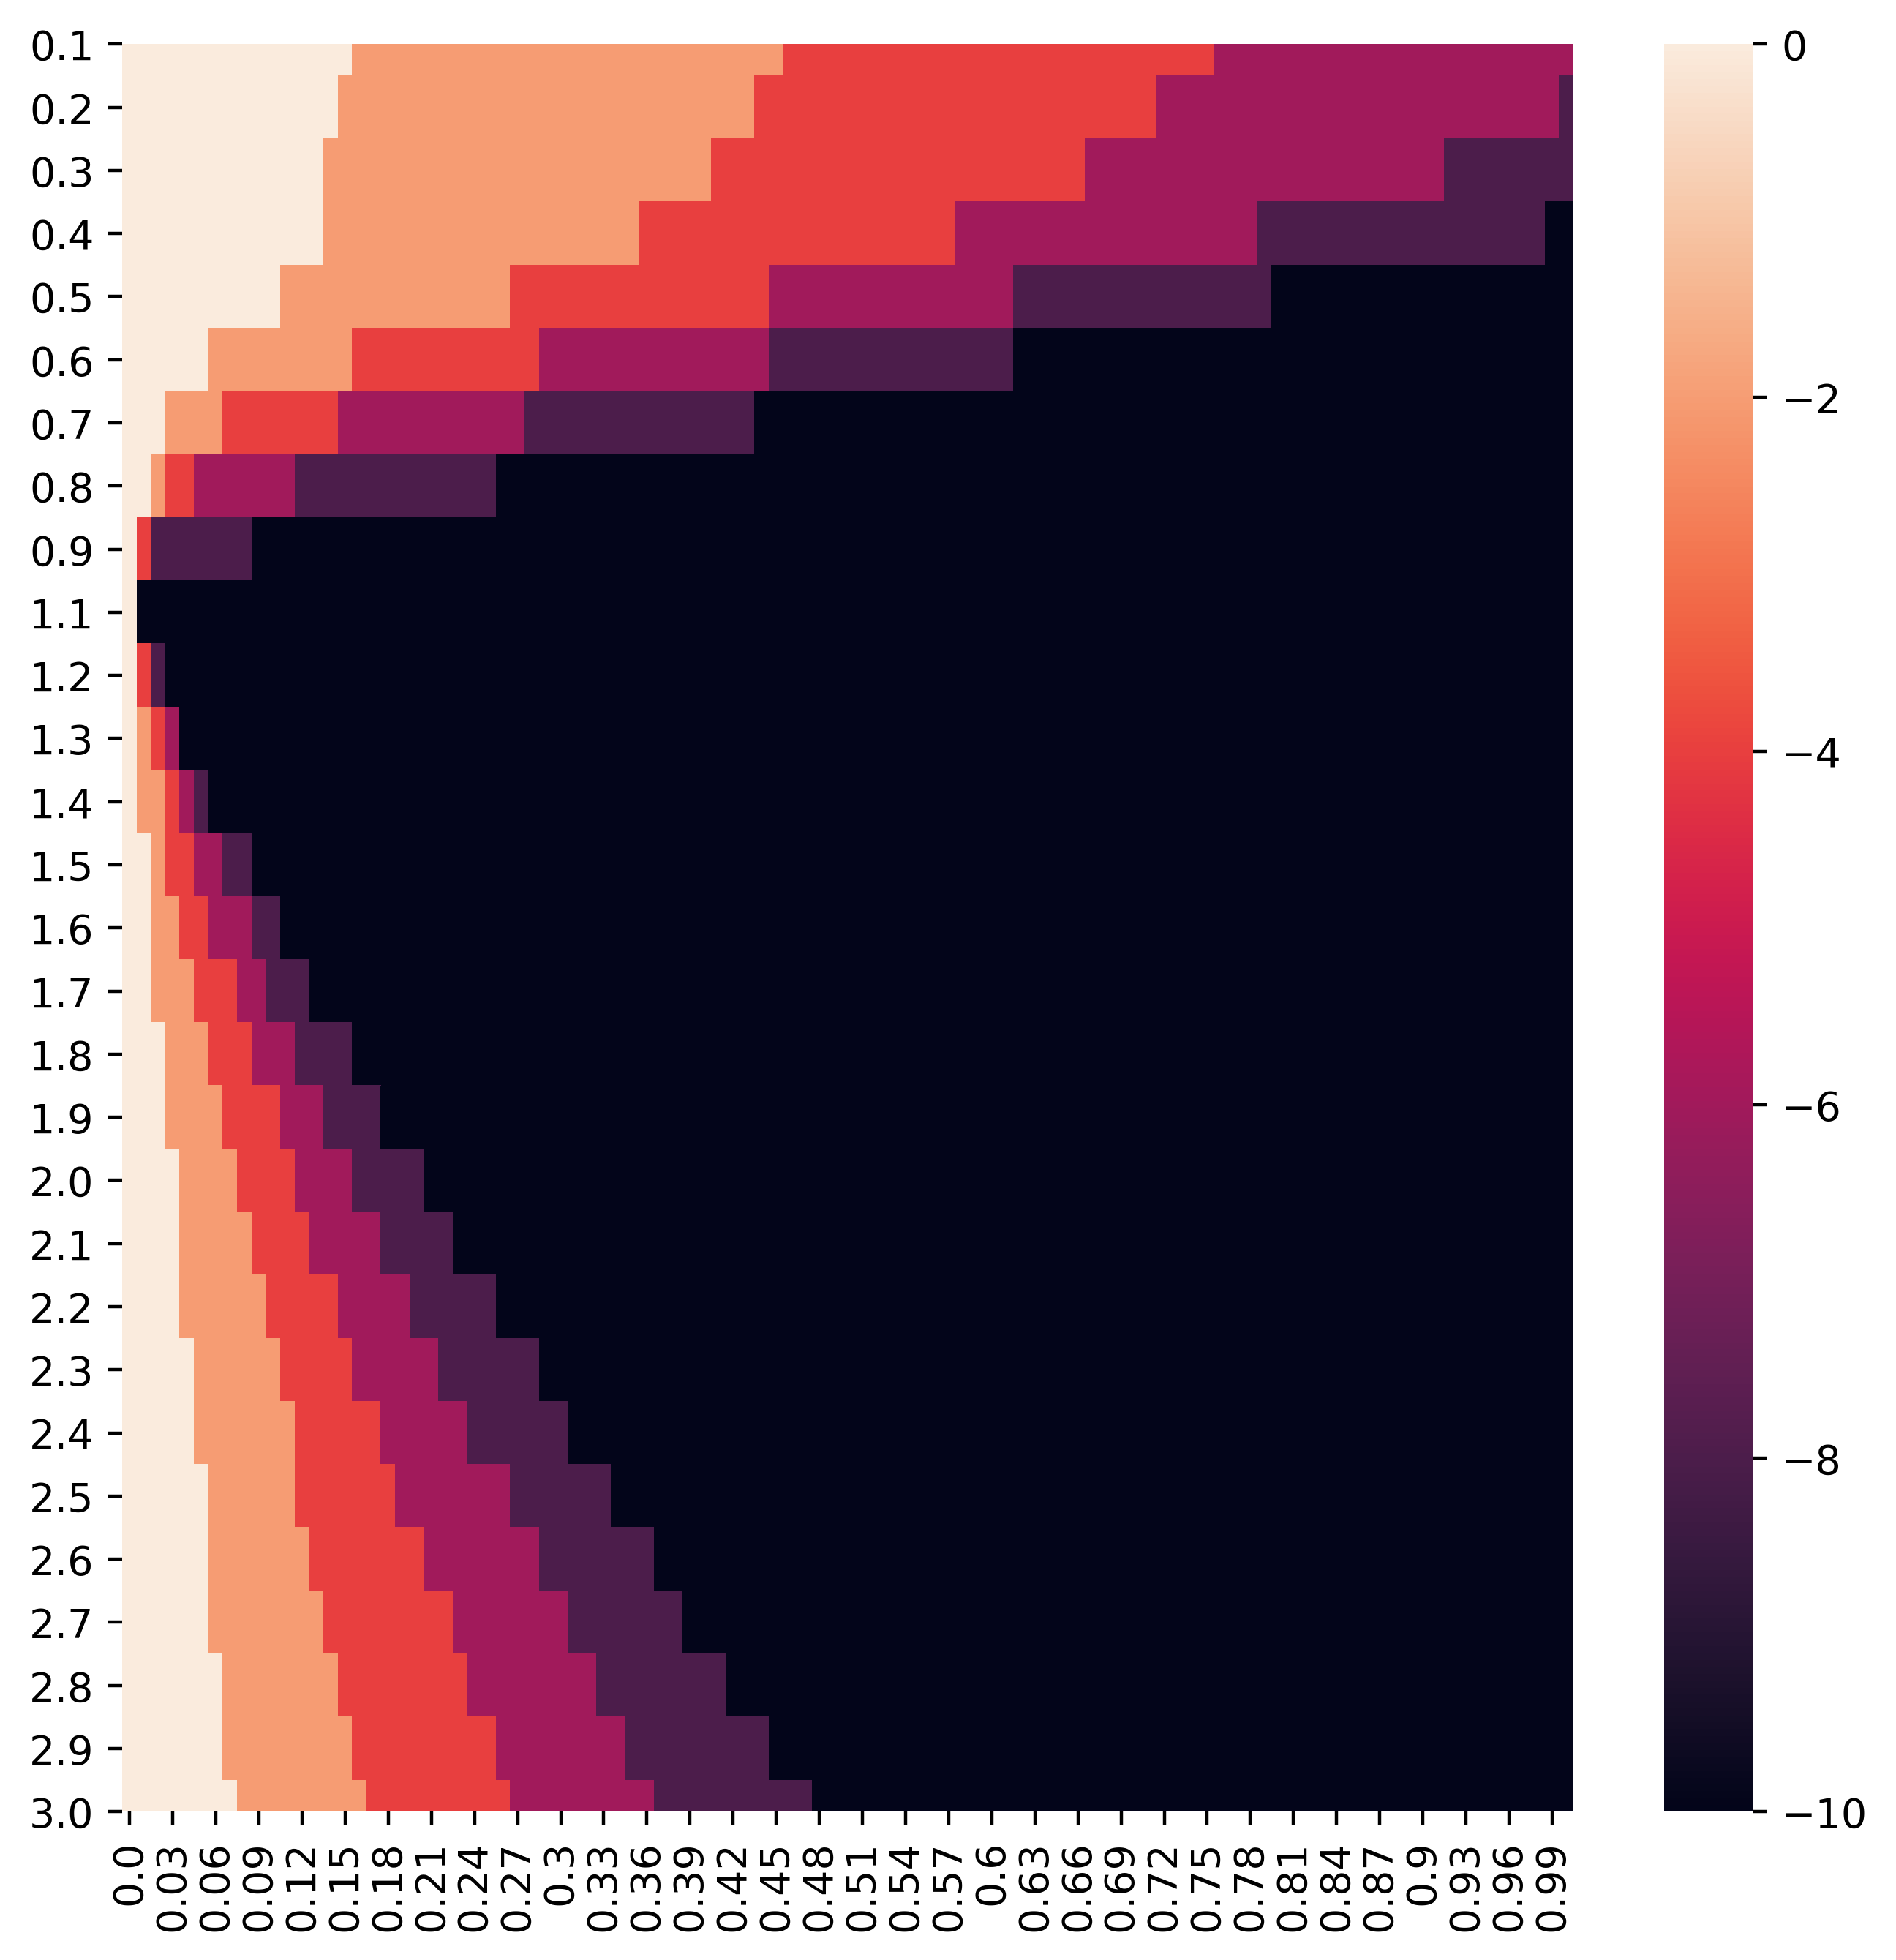

In [2]:
l = 20
L = 2*l
N = 20
Ne = N//2
Nws = np.arange(0, Ne+1, 2) # Not going to check Nw > Ne because that's for Sz > 0
if Ne >= l:
    Nws = 2*l - Nws
    print(Nws)
k = np.arange(1, 2*l+1, 2)*0.5*np.pi/l
Gs = np.arange(.2, 3.2, .2)/np.sum(k)
print(Gs*np.sum(k))

filen = 'pol_results_Ne{}.p'.format(Ne)
outputs = pickle.load(open(filen, 'rb'))
hs = np.arange(0, 1.01, .01)
Szs = Nws - Ne
# mags = np.zeros((len(hs), len(outputs[0]['G'])))
mags = pd.DataFrame({})
for n, h in enumerate(hs):
    mags_h = np.zeros(len(outputs[0]['G']))
    for i, G in enumerate(outputs[0]['G']):
        energies = [outputs[j]['energy'].iloc[i] + h * Szs[j] for j in range(len(outputs))]
        min_Ne_ind = np.argmin((energies))
        mags_h[i] = Szs[min_Ne_ind]
    mags[np.round(h, 2)] = mags_h
    
plt.figure(figsize=(8,8), dpi=400)
yticks = np.round(outputs[0]['G']*np.sum(k), 1)
sns.heatmap(mags, yticklabels=yticks)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8a501260d0>,)

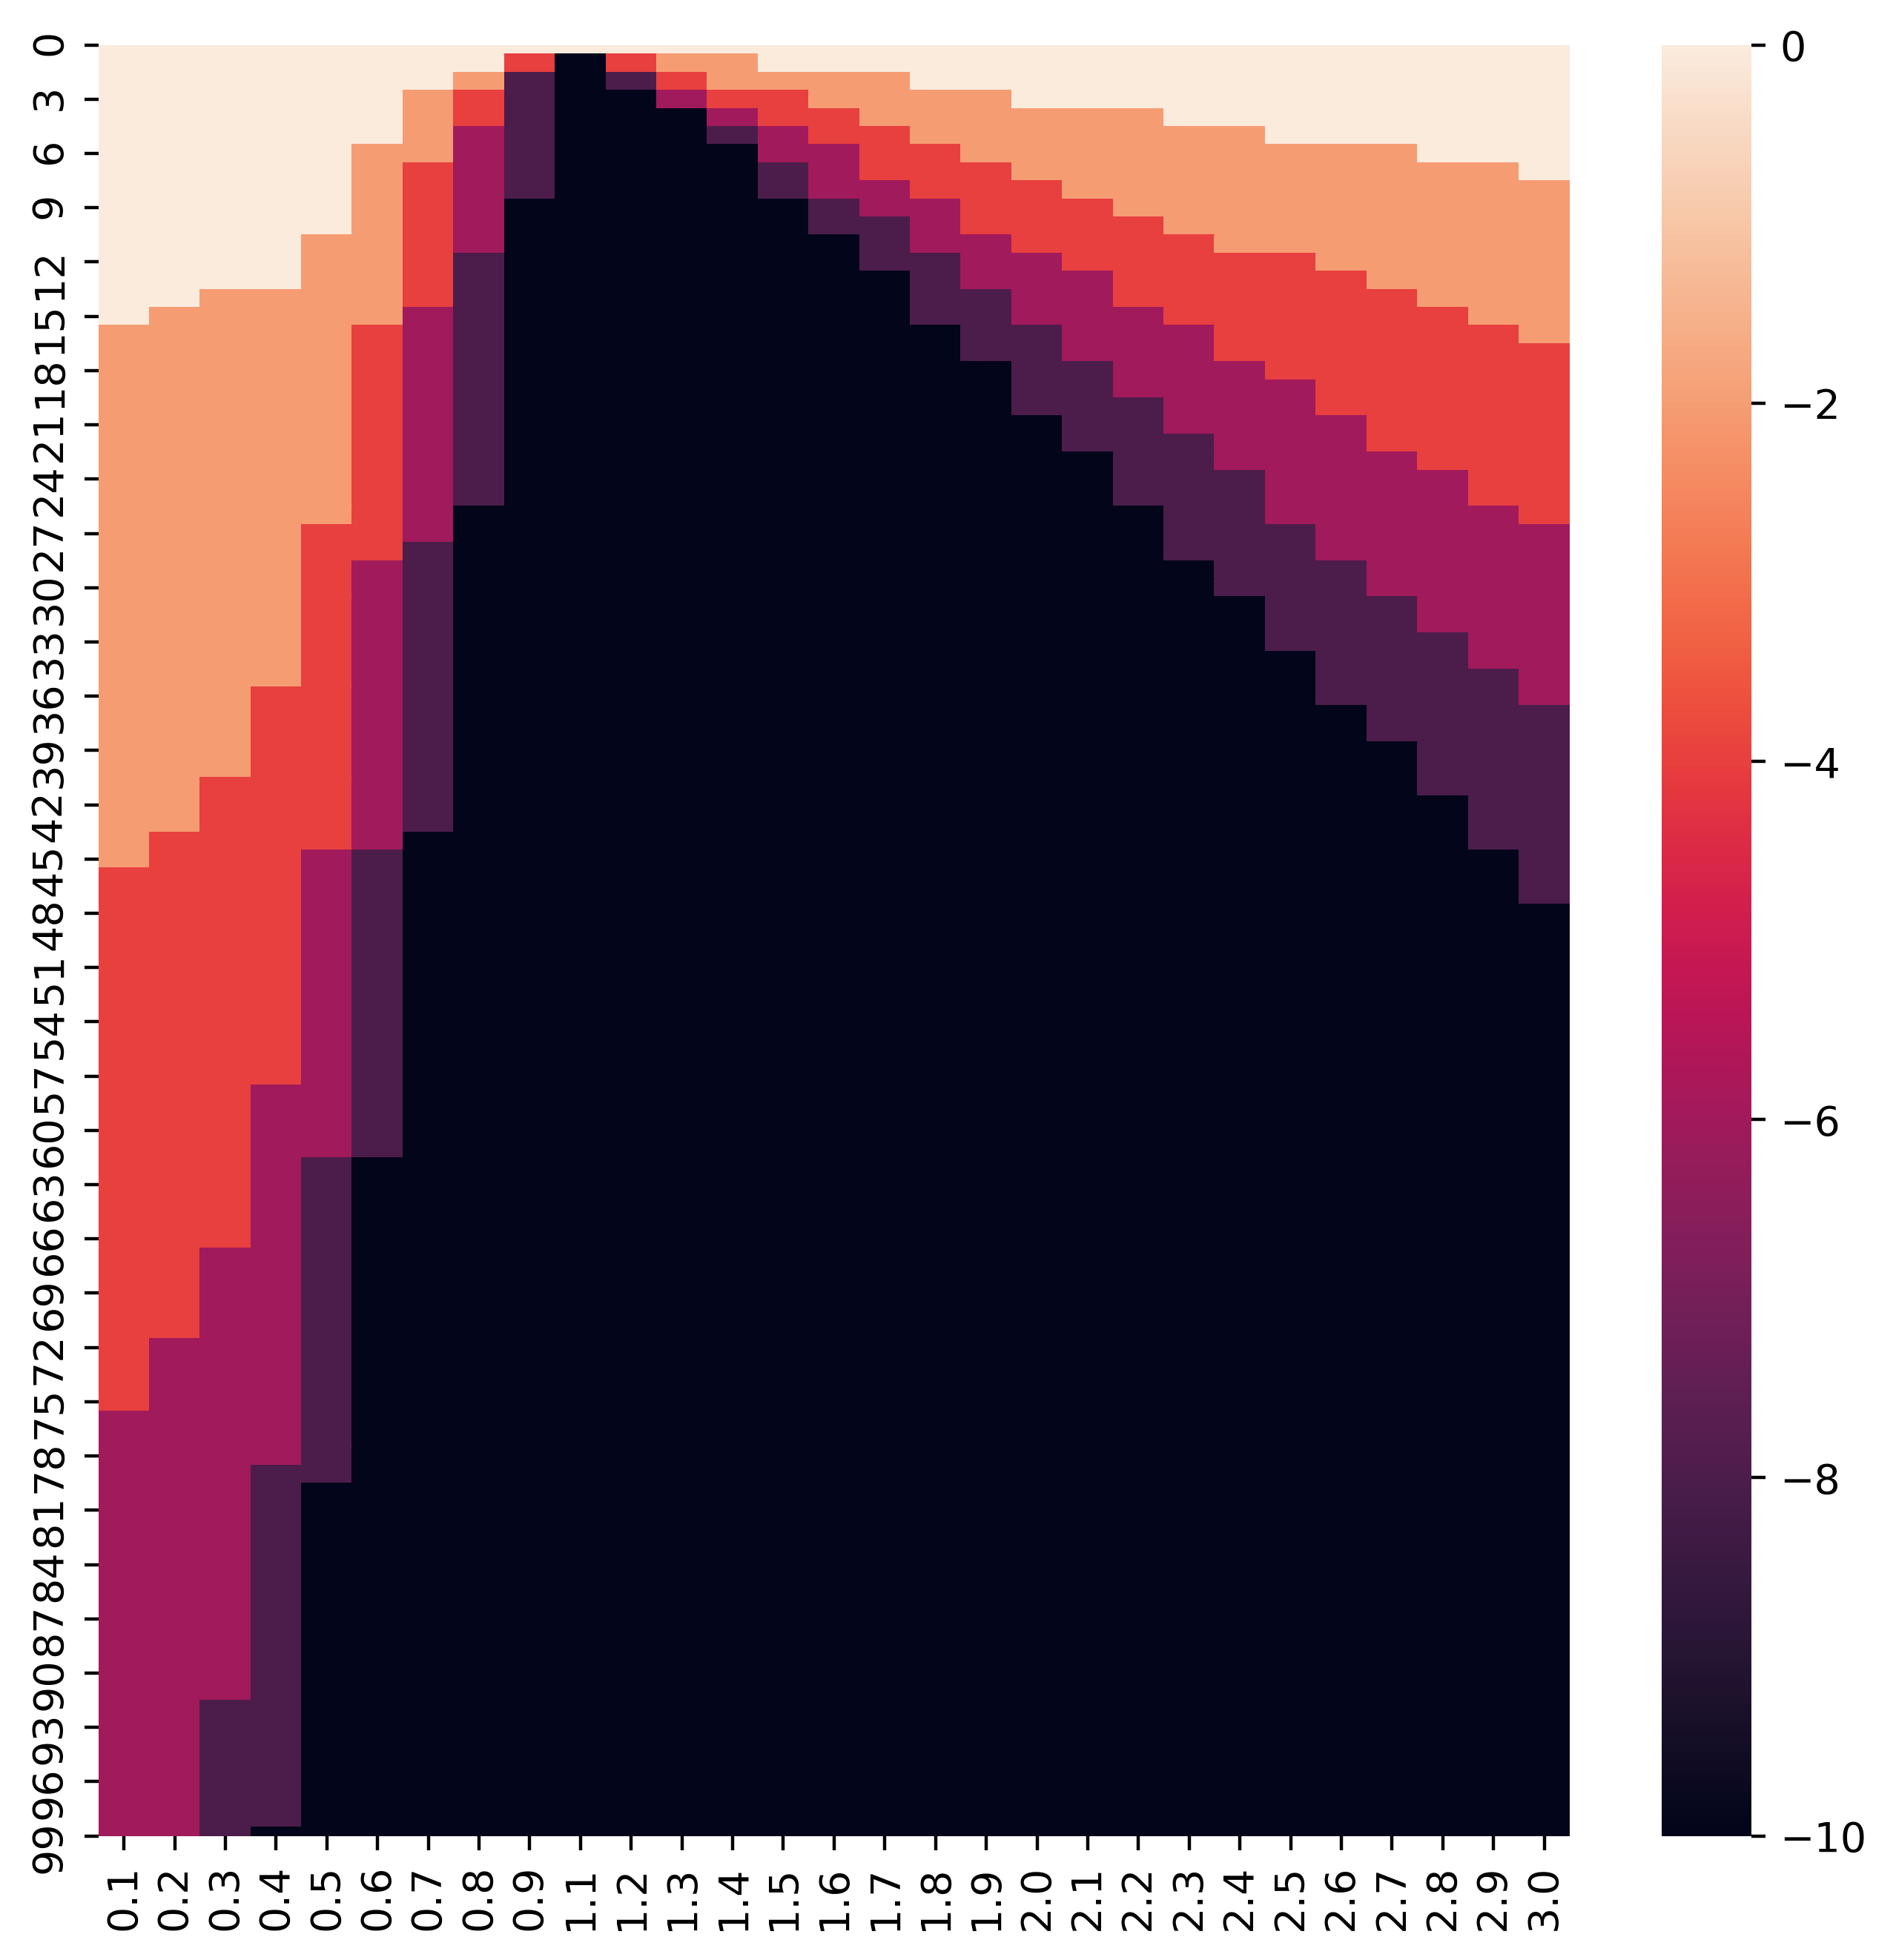

In [3]:
# mags = np.zeros((len(hs), len(outputs[0]['G'])))
mags = pd.DataFrame({})
for i, G in enumerate(outputs[0]['G']):
    mags_h = np.zeros(len(hs))
    for j, h in enumerate(hs):
        energies = [outputs[k]['energy'].iloc[i] + h * Szs[k] for k in range(len(outputs))]
        min_Ne_ind = np.argmin((energies))
        mags_h[j] = Szs[min_Ne_ind]
    mags[np.round(G*np.sum(k), 2)] = mags_h
plt.figure(figsize=(8,8), dpi=400)
yticks = np.round(hs, 1)
sns.heatmap(mags), # yticklabels=yticks)

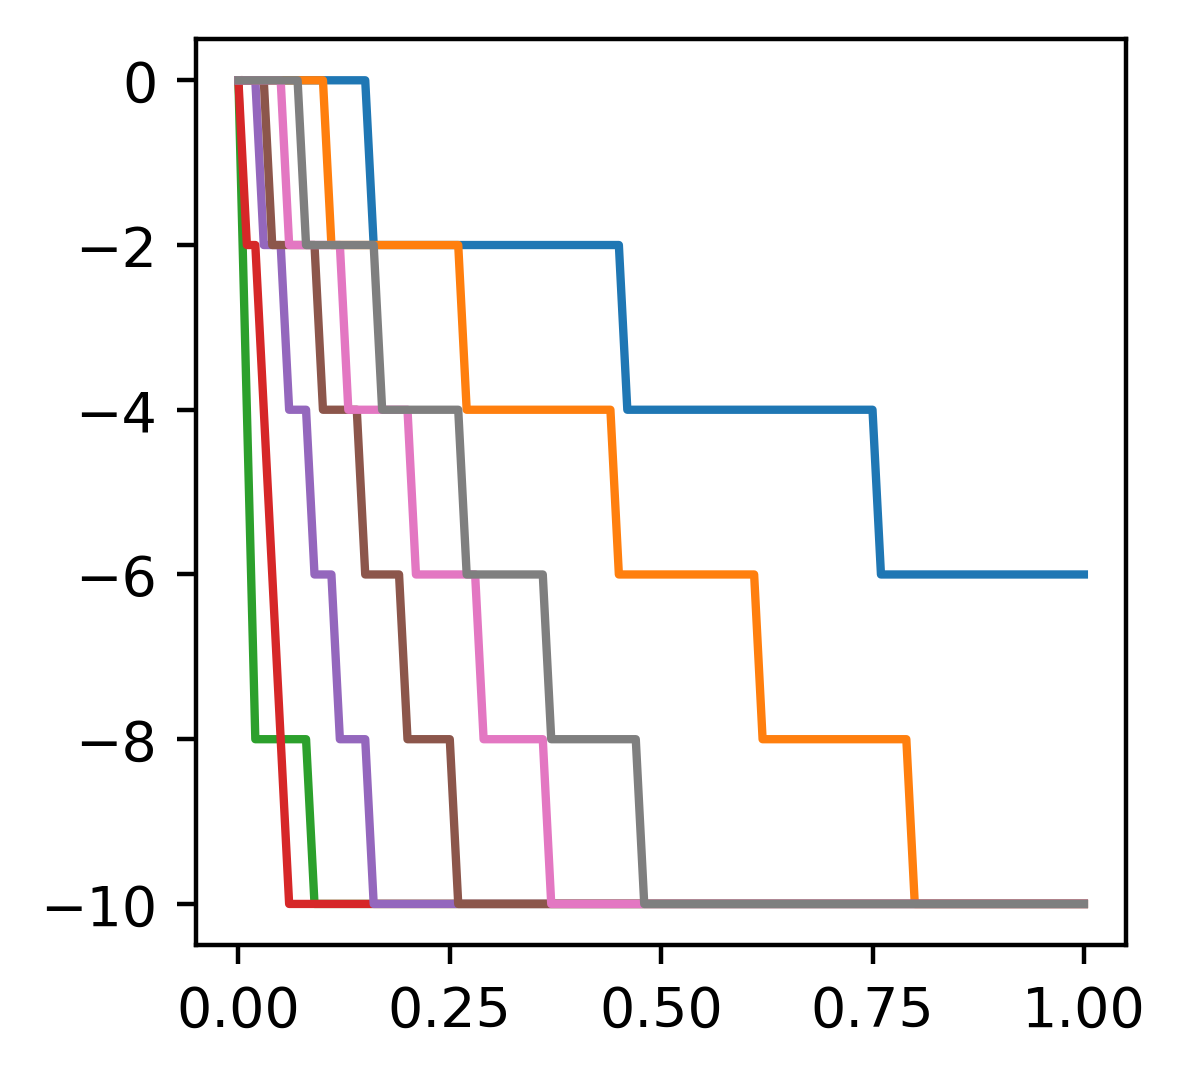

In [4]:
plt.figure(figsize=(3,3), dpi=400)
for i, G in enumerate(mags):
    if i % 4 == 0:
        plt.plot(hs, mags[G], label = r'$G/G_c$= {}'.format(np.round(G, 1)))
# plt.legend()

# New run

## Setup
First, let's set physical parameters.

In [ ]:
l = 4
L = 2*l
N = 3*l
Ne = N//2
if N <= 2*l: # below half-filling
    Nws = np.arange(0, Ne+1, 2) # Not going to check Nw > Ne because that's for Sz > 0
else:
    # above half filling
    # Can fit at most L spin down fermions, L spin up
    # Nw = Ne + Sz = Ne + .5(Nup - Ndown)
    # max(Ndown) = 2*L
    # min(Sz) = .5((N-L) - L) = .5*(N - 4*L)
    min_Nw = Ne + (N-4*l)//2
    Nws = np.arange(min_Nw, Ne+1, 2)
Nws = [Ne]
print(Nws)
k = np.arange(1, 2*l+1, 2)*0.5*np.pi/l
Gs = np.arange(.6, 3.2, .2)/np.sum(k)
print(Gs*np.sum(k))

Now, let's set numerical parameters. These can be sensitive.

In [6]:
dg = 0.04/L # step size of g.
g0 = dg/L # initial value of g
imk = dg # scale of the imaginary parts added to k
imv = g0/L # scale of the imaginary parts used in the initial guess

skip=N # it's harder for larger N, so let's make it easy on us

## Solving RG equations
Now, we solve the RG equations for each value of Nw (representing different polarizations).
We can calculate energy with different fields afterwards to find which polarization minimizes energy in each situation.

In [ ]:
ki = (-1)**np.arange(l)*imk
kc = np.concatenate((k, ki))
outputs = []
for Nw in Nws:
    dims = (l, Ne, Nw)
    sol = bootstrap_g0(dims, g0, kc, imscale_v=imv)
    outputs += [solve_Gs_list(dims, sol, Gs, k, dg=dg, g0=g0, imscale_k=imk, imscale_v=imv)]


Now using 4 fermions
Ne, Nw = (2, 2)

Variable guess
[0.3926027+0.00500424j 0.3926027+0.0049933j ]
[0.39266695+0.00474959j 0.39266695+0.00524959j]
Omega = 0 solution! Rerunning.
Bad initial guess. Trying with noise.
g = 0.000625, er = 1
1th try at g = 0.000625
Smallest error from last set: 1
Noise ranges from -7.653596392227433e-05 to 7.565833363772953e-05
Error with 4 fermions: 4.121141210407242e-13
2

Now using 8 fermions
Ne, Nw = (4, 4)

Variable guess
[0.39247099+0.00499419j 0.39263794+0.00499844j 1.1772298 -0.00498538j
 1.1772298 -0.00500726j]
[0.39255567+0.00494812j 0.39255321+0.00504451j 1.1778081 -0.00549877j
 1.1778081 -0.00449877j]
Omega = 0 solution! Rerunning.
Bad initial guess. Trying with noise.
g = 0.000625, er = 1
1th try at g = 0.000625
Smallest error from last set: 1
Noise ranges from -7.660281606614845e-05 to 7.811189071170884e-05
25th try at g = 0.000625
Smallest error from last set: 0.0013113517897047281
Noise ranges from -7.9137190083406e-05 to 7.577250543797812e

Process ForkProcess-68532:
Process ForkProcess-68496:
Process ForkProcess-68519:
Process ForkProcess-68502:
Process ForkProcess-68533:
Process ForkProcess-68527:
Process ForkProcess-68500:
Process ForkProcess-68484:
Process ForkProcess-68474:
Process ForkProcess-68494:
Process ForkProcess-68535:
Process ForkProcess-68542:
Process ForkProcess-68540:
Process ForkProcess-68539:
Process ForkProcess-68517:
Process ForkProcess-68521:
Process ForkProcess-68499:
Process ForkProcess-68518:
Process ForkProcess-68543:
Process ForkProcess-68492:
Process ForkProcess-68509:
Process ForkProcess-68486:
Process ForkProcess-68528:
Process ForkProcess-68531:
Process ForkProcess-68456:
Process ForkProcess-68534:
Process ForkProcess-68541:
Process ForkProcess-68536:
Process ForkProcess-68514:
Process ForkProcess-68523:
Process ForkProcess-68465:
Process ForkProcess-68522:
Process ForkProcess-68458:
Process ForkProcess-68504:
Process ForkProcess-68516:
Process ForkProcess-68495:
Process ForkProcess-68525:
P

# Energies with magnetic field

In [ ]:
h = .8 # so spin-down has lower energy
for i, o in enumerate(outputs):
    Sz = Nws[i] - Ne
    print('Total Sz:')
    print(Sz)
    print(o['energy'].iloc[-1] + h * Sz)

In [ ]:
plt.figure(figsize=(4,4), dpi=400)
h = .5
for i, o in enumerate(outputs):
    Sz = Nws[i] - Ne
    print('Total Sz:')
    print(Sz)
    plt.plot(o['G']*np.sum(k), o['energy'] + h*Sz, label='Sz = {}'.format(Sz))
plt.legend()

In [ ]:
import seaborn as sns

In [ ]:
hs = np.arange(0, 1.1, .1)
print(hs)
energies = []
for h in hs:
    energies_h = []
    for i, o in enumerate(outputs):
        energies_h += [o['energy'] + (Nws[i]-Ne)*h]
    energies += [energies_h]

In [ ]:
import pickle
filen = 'pol_results_Ne{}.p'.format(Ne)
pickle.dump(outputs, open(filen, 'wb'))